#**CHURN** **EDA**

---



##***Necessary Libraries:***##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Loading Data:***

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***Checking Data Types:***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Checking null values:***

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


***Checking value counts of all Categorical features***

In [ ]:
for i in data.select_dtypes(include = 'object').columns:
    print(i)
    print(data[i].value_counts(normalize = True) * 100)
    print("*"*35)

customerID
customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64
***********************************
gender
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
***********************************
Partner
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
***********************************
Dependents
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
***********************************
PhoneService
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
***********************************
MultipleLines
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

***Converting Total Charges into numerical***

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")

***Verifying data types***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Again Checking null values***

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


***Droping null values***

In [ ]:
data.dropna(inplace = True)

##***Univariant Analysis***##

***Univariant Analysis of numeric columns in histogram***
 - Generate separate histogram plots for each numerical feature in the dataset. For instance, if the dataset includes columns like tenure, MonthlyCharges, and TotalCharges.

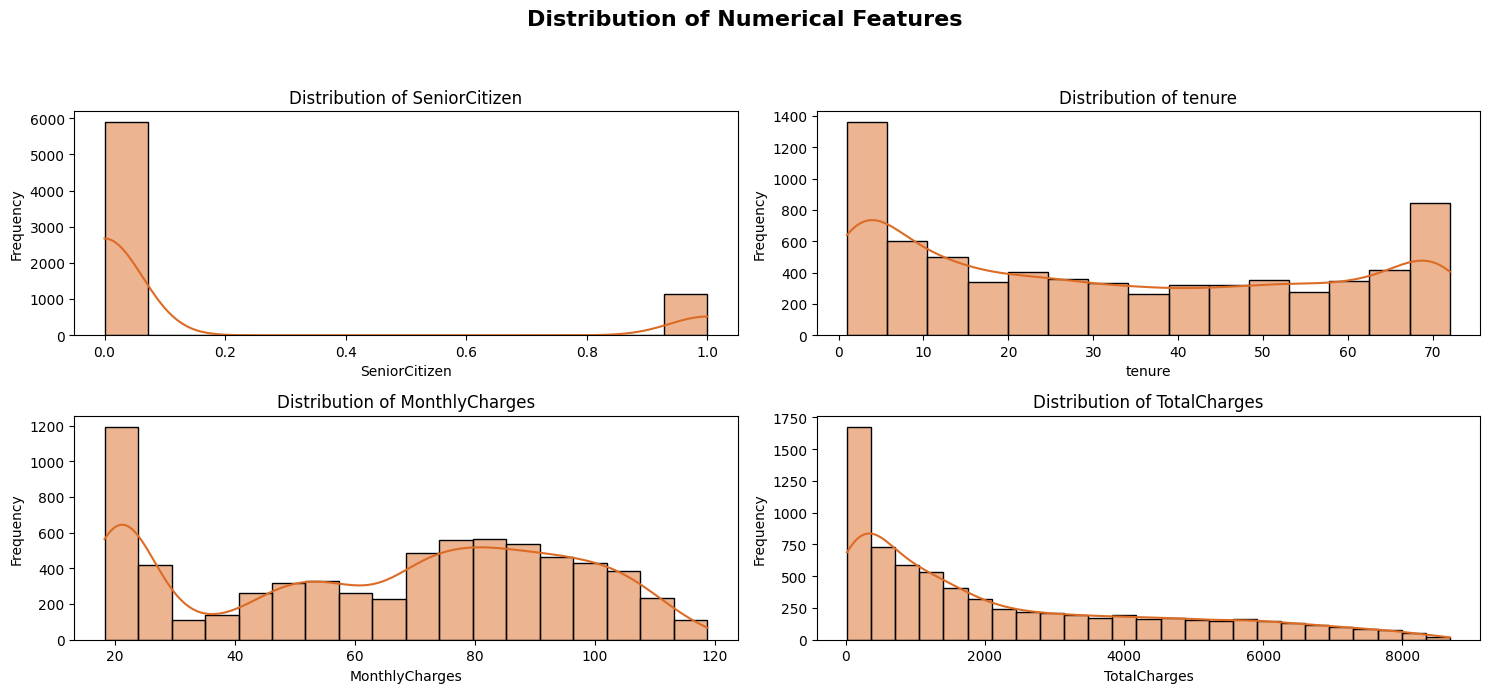

In [ ]:
numerical_features = data.select_dtypes(include="number").columns
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold")
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[numerical_features[i]], kde=True, color="#DB6B25")
    plt.title(f"Distribution of {numerical_features[i]}")
    plt.xlabel(numerical_features[i])
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#**Here's a meaningful interpretation of the skewness values for the columns SeniorCitizen, tenure, MonthlyCharges, and TotalCharges:**

- **SeniorCitizen :** **1.8311** = Skewness value of 1.8311 indicates a positive skew (right-skewed) distribution. This means that a majority of the customers are not senior citizens.

- **Tenure :** **0.237731** = Skewness value of 0.237731 is close to zero, indicating that the distribution of tenure is relatively symmetrical. This suggests that customers are evenly distributed across different tenures

- **MonthlyCharges :** **-0.222103** = Skewness value of -0.222103 indicates a negative skew (left-skewed) distribution. This means that most customers have lower monthly charges, with fewer customers having significantly higher charges.

- **TotalCharges :** **0.961642** =  Skewness value of 0.961642 indicates a positive skew (right-skewed) distribution similar to SeniorCitizen. This suggests that most customers have lower total charges.

***Univariant Analysis of numeric columns in boxplot:***

- It shows boxplots for each numerical feature in the dataset, such as SeniorCitizen, tenure, MonthlyCharges, and TotalCharges.

- There is no outlers in SeniorCitizen, Tenure, MonthlyCharges and TotalChargesthere


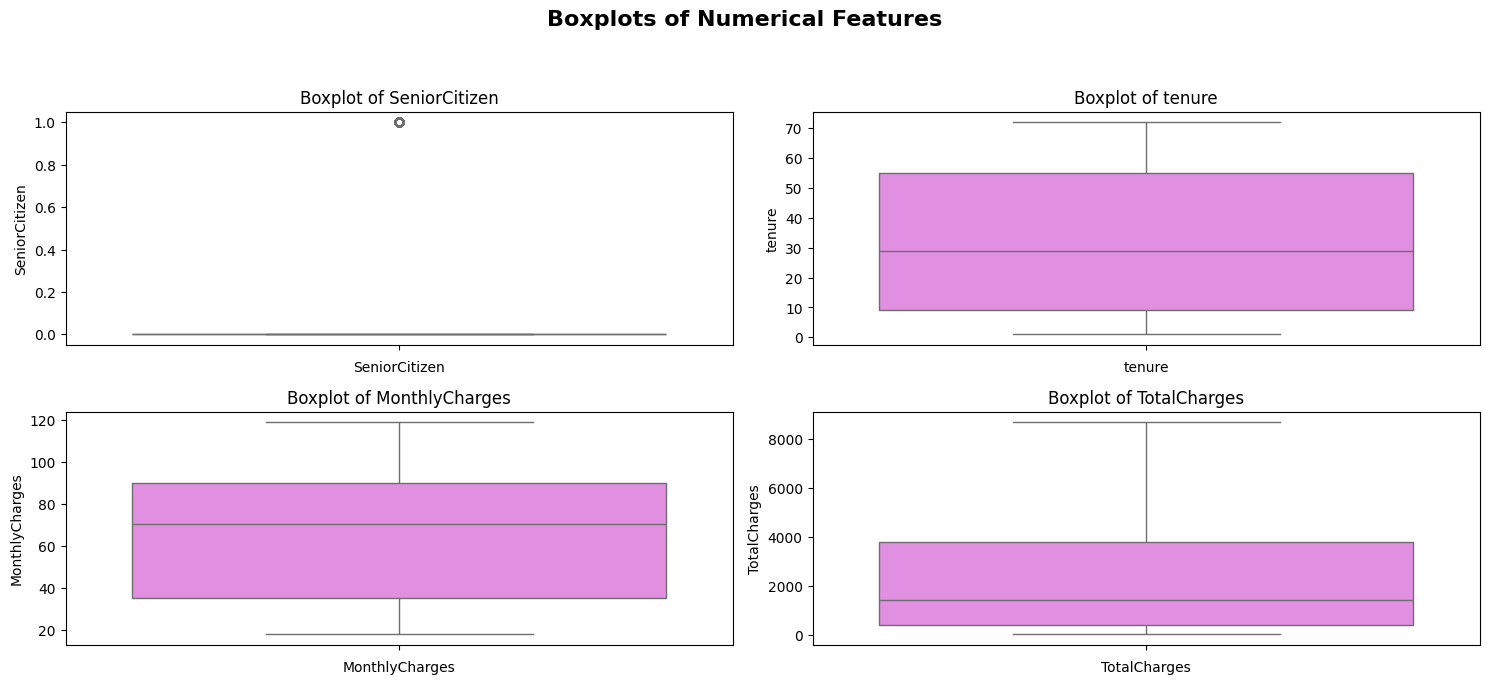

In [ ]:
numerical_features = data.select_dtypes(include="number").columns
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots of Numerical Features", fontsize=16, fontweight="bold")
for i in range(len(numerical_features)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data[numerical_features[i]], color="violet")
    plt.title(f"Boxplot of {numerical_features[i]}")
    plt.xlabel(numerical_features[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**In numeric columns no outliers**

***Univariant Analysis of categorical columns in countplot***
 - Countplot Analysis of Categorical Features
The following countplots illustrate the distribution of key categorical features from our customer churn dataset:
   

In [ ]:
#data.drop("customerID", axis=1, inplace=True)

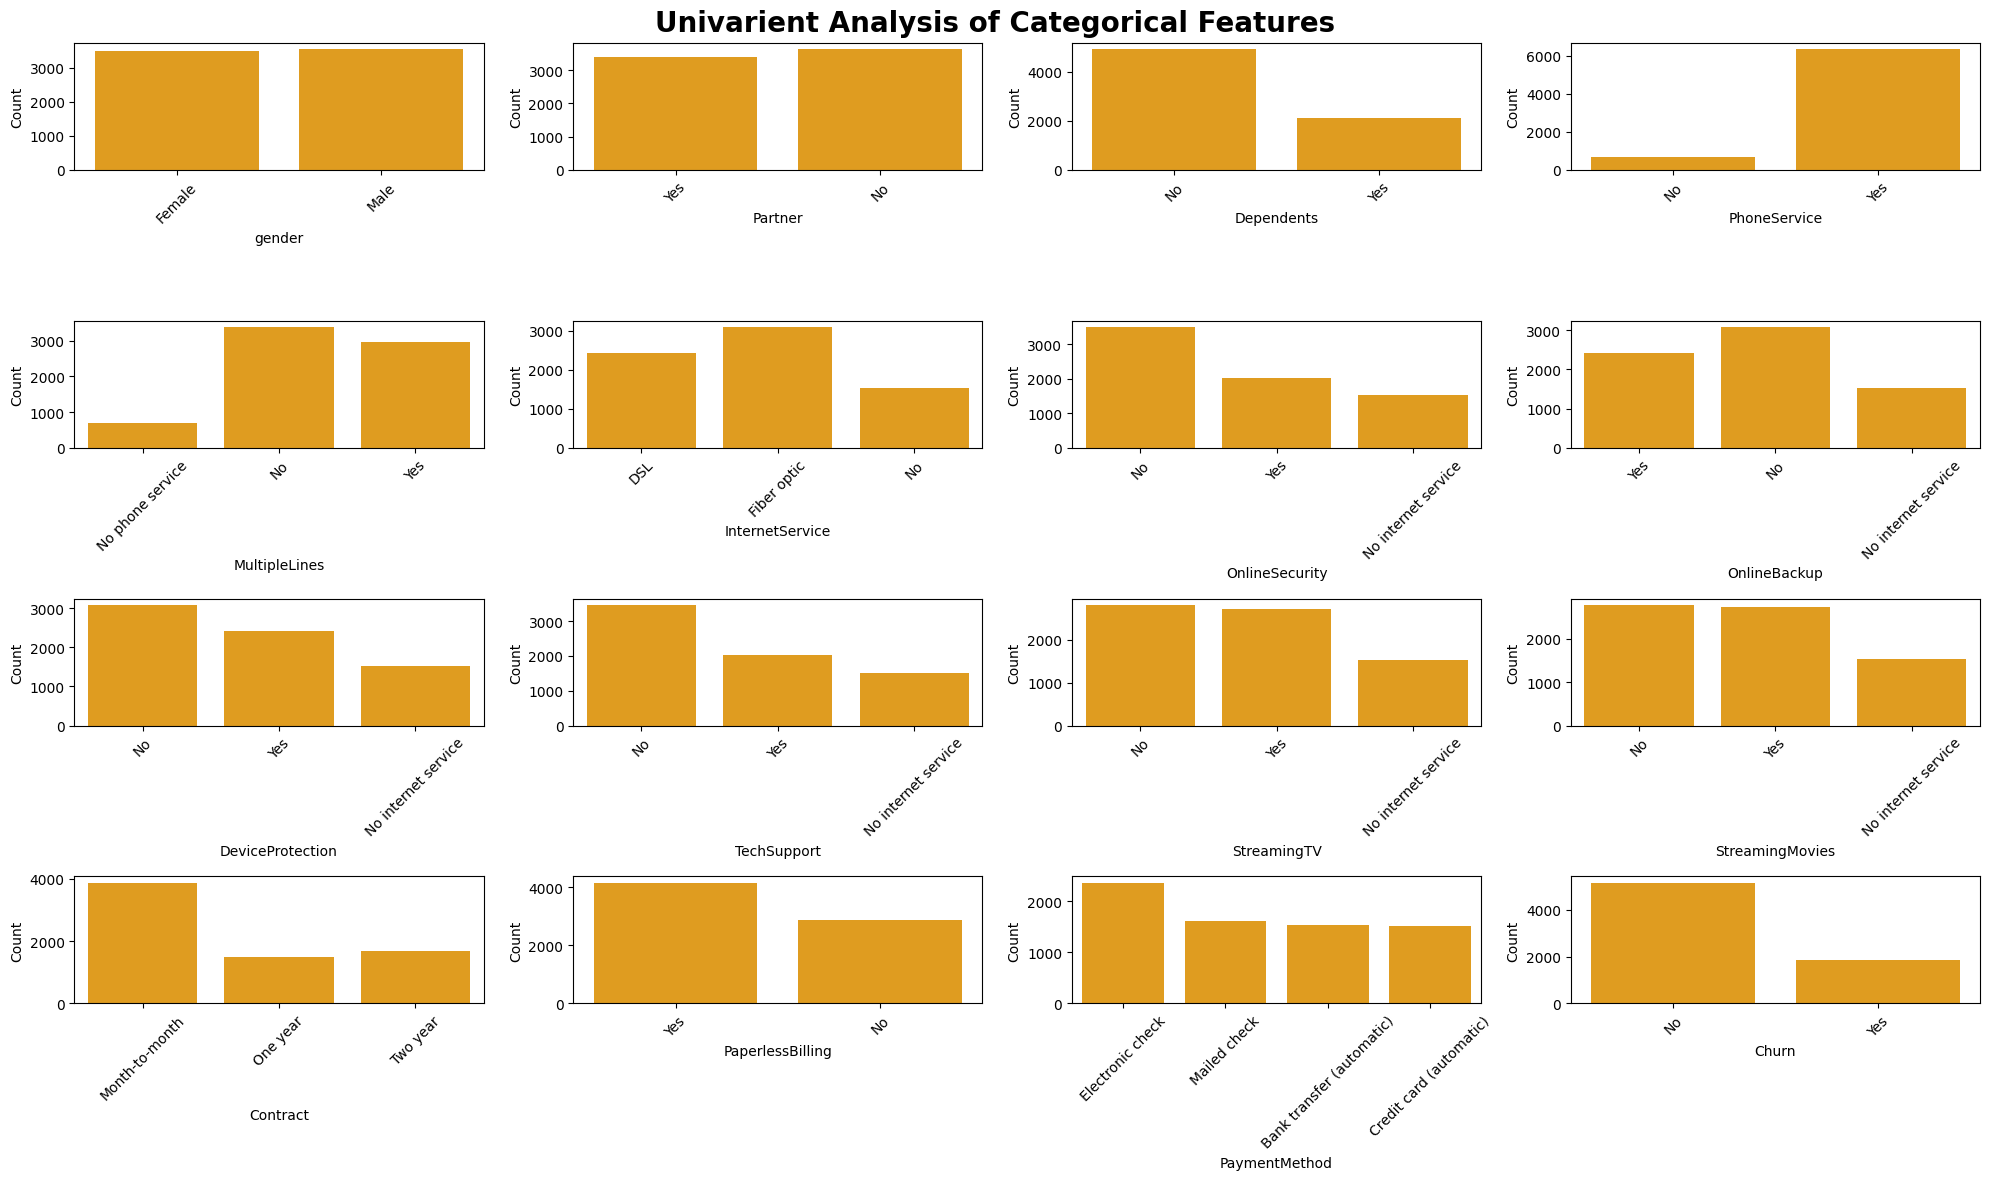

In [ ]:
categorical_features = data.select_dtypes(include='object').columns
plt.figure(figsize=(20, 12))
plt.suptitle("Univarient Analysis of Categorical Features", fontsize=20, fontweight="bold")

for i in range(0, len(categorical_features)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=data[categorical_features[i]], color="Orange")
    plt.xlabel(categorical_features[i])
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


 - The countplot reveals a balanced representation of male and female  customers, providing insights into our customer base

 - The analysis shows that a significant portion of our customers have partners.

 - The distribution of dependents suggests that a considerable number of
  customers are family-oriented.

#Conclusion
 - Countplots are an essential tool in exploratory data analysis, providing valuable insights into categorical variables that can inform business strategies and decision-making processes

***Univariant Analysis of categorical columns in pie chart***

- The pie chart below illustrates the percentage distribution of various internet service types among our customers.

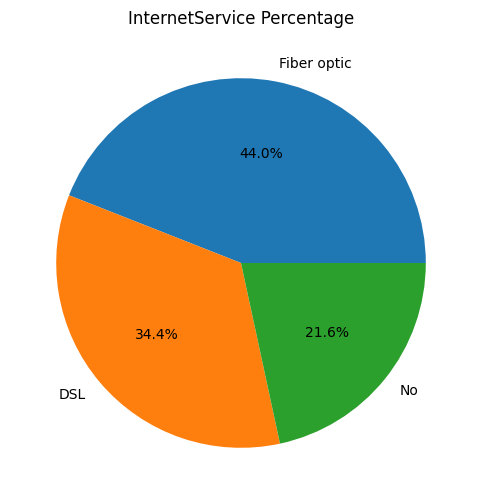

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data["InternetService"].value_counts(), labels=data["InternetService"].value_counts().index, autopct="%1.1f%%")
plt.title("InternetService Percentage")
plt.show()

### Key Insights:
- There is a growing trend towards Fiber optic services.
- A significant portion of customers prefer DSL services.
- A notable percentage of customers do not subscribe to any internet service.

**The pie chart below illustrates the percentage distribution of customer churn **

- Churned Customers (Yes): Represents customers who have left the service.

- Retained Customers (No): Represents customers who continue to use our services.

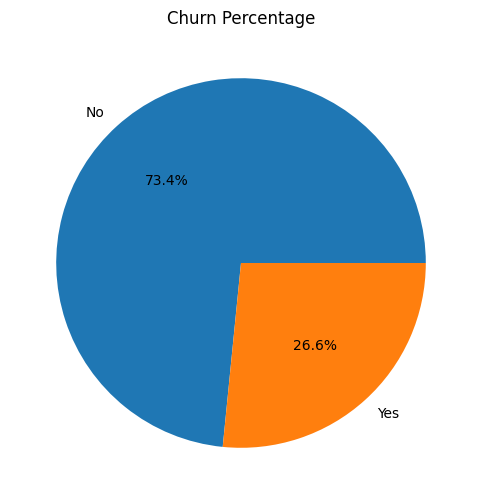

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data["Churn"].value_counts(), labels=data["Churn"].value_counts().index, autopct="%1.1f%%")
plt.title("Churn Percentage")
plt.show()

#Conclusion

***Data Imbalance***
 - The analysis reveals that a significant portion of our customer base has churned. However, this also highlights a critical aspect of our dataset: it is imbalanced.

##***Bivariant Analysis and Multivariant Analysis***##

***Analysis of Customer Tenure vs. Monthly Charges
The scatter plot below illustrates the relationship between customer tenure (in months) and their monthly charges, differentiated by churn status***

***Relationship Between in tenure and MonthlyCharges by churn***

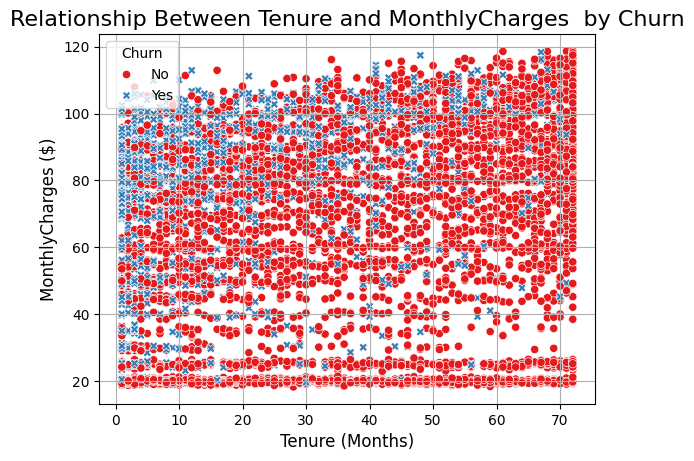

In [ ]:
sns.scatterplot(x="tenure", y="MonthlyCharges", data=data, hue="Churn", style="Churn", palette="Set1")
plt.title("Relationship Between Tenure and MonthlyCharges  by Churn", fontsize=16)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("MonthlyCharges ($)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Churn")
plt.grid(True)
plt.show()


- X-Axis: Represents the tenure of customers in months.
- Y-Axis: Represents the monthly charges incurred by customers.
- Color Coding: Points are colored based on whether customers have churned (Yes) or retained (No), allowing for easy identification of churn patterns.

##***The scatter plot below illustrates the relationship between customer tenure (in months) and their total charges, differentiated by churn status.***##





***Relationship Between in tenure and totalcharges by churn***

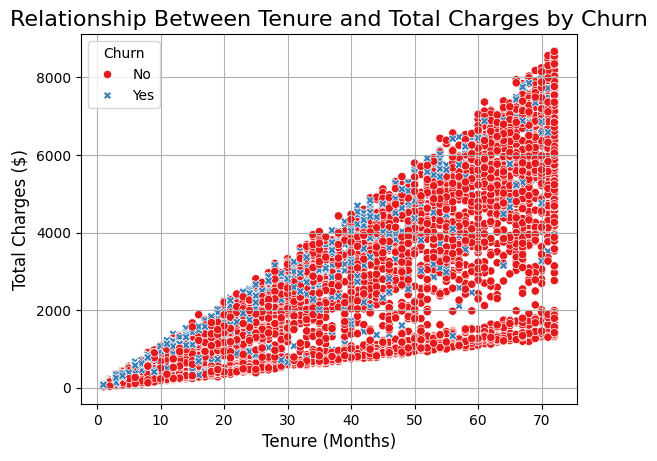

In [ ]:
sns.scatterplot(x="tenure", y="TotalCharges", data=data, hue="Churn",style="Churn", palette="Set1")
plt.title("Relationship Between Tenure and Total Charges by Churn", fontsize=16)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Total Charges ($)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Churn")
plt.grid(True)
plt.show()


- X-Axis: Represents the tenure of customers in months.
- Y-Axis: Represents the total charges incurred by customers.

***Analysis of Average Tenure by Churn Status***
 - The bar plot below illustrates the average tenure of customers based on their churn status.


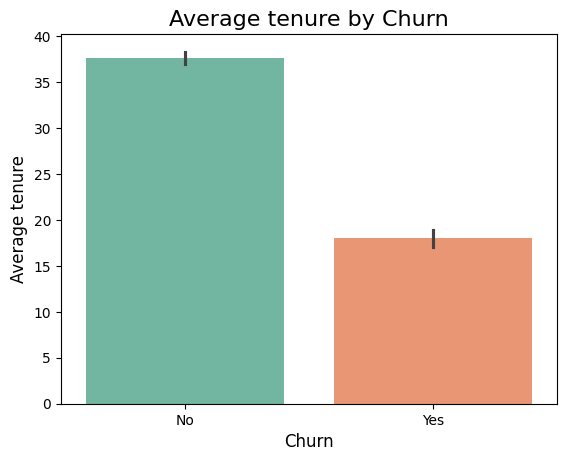

In [ ]:
sns.barplot(x="Churn", y="tenure", data=data,palette='Set2')
plt.title('Average tenure by Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Average tenure', fontsize=12)

plt.show()

Conclusion
- The average tenure for retained customers is significantly higher than that of churned customers. This suggests that longer-tenured customers are more likely to remain with the service.

***Analysis of Average Monthly Charges by Churn Status***

- The bar plot below illustrates the average monthly charges incurred by customers based on their churn status

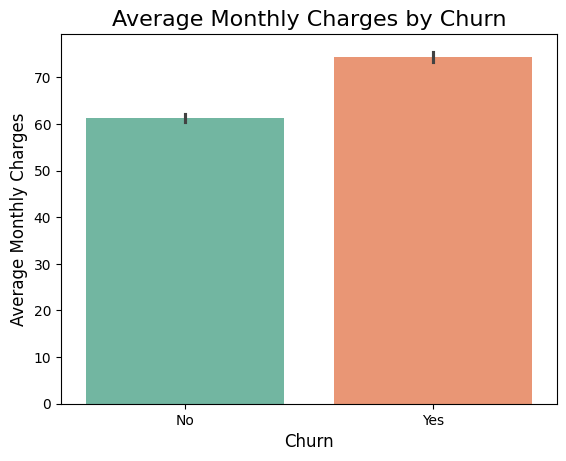

In [ ]:
sns.barplot(data=data, x='Churn', y='MonthlyCharges', palette='Set2')

plt.title('Average Monthly Charges by Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Average Monthly Charges', fontsize=12)

plt.show()

Conclusion:
- The average monthly charges for churned customers may be significantly different from those of retained customers.

***Analysis of Average Total Charges by Churn Status***


- The bar plot below illustrates the average total charges incurred by customers based on their churn status

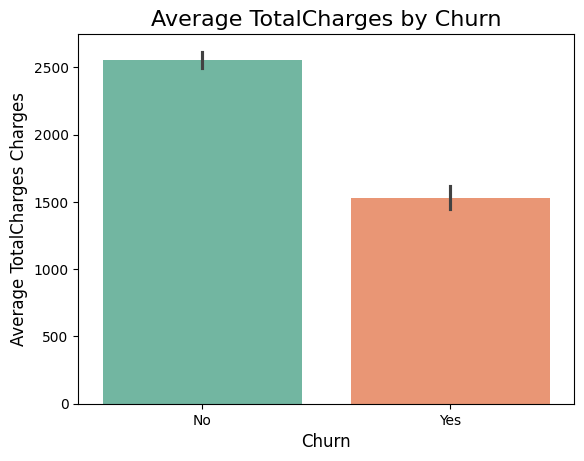

In [ ]:
sns.barplot(data=data, x='Churn', y='TotalCharges', palette='Set2')
plt.title('Average TotalCharges by Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Average TotalCharges Charges', fontsize=12)
plt.show()

This plots will display the average MonthlyCharges,TotalCharges, tenure for customers who churned (Yes) vs those who did not churn (No).

***Visualization of Monthly Charges by Churn Status***

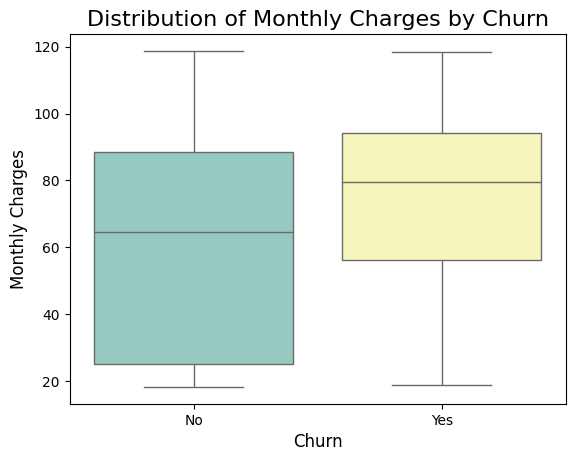

In [ ]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Distribution of Monthly Charges by Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.show()

Key Insights:

- The box plot shows the median monthly charges for both churned and retained *customers*

***Analysis of Monthly Charges by Churn Status***
 - The box plot below illustrates the distribution of monthly charges incurred by customers based on their churn status

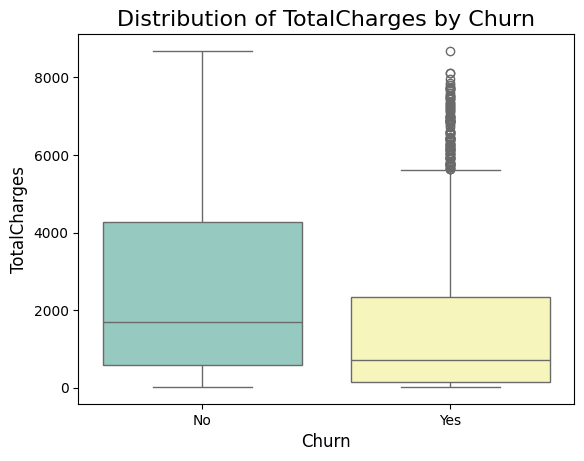

In [ ]:
sns.boxplot(data=data, x='Churn', y='TotalCharges', palette='Set3')
plt.title('Distribution of TotalCharges by Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('TotalCharges', fontsize=12)
plt.show()

Key Insights:

- Variability:
The height of the boxes indicates the interquartile range (IQR), which reflects the variability in total charges within each group.
- Outliers:
Points outside the whiskers represent outliers, indicating customers with significantly higher or lower charges compared to their peers.

**Analysis of Customer Retention by Contract Type**

- In this segment, we will explore the relationship between customer churn and contract types using a heatmap.
- This analysis is essential for understanding how different contract types impact customer retention.

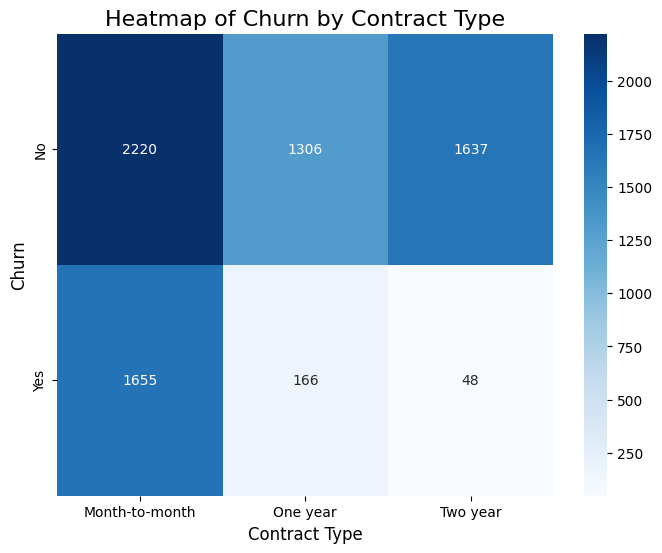

In [ ]:
heatmap_data = pd.crosstab(data['Churn'], data['Contract'])
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Churn by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn', fontsize=12)
plt.show()

Key insights:
- Darker shades indicate higher counts of customers in that category, while lighter shades represent lower counts.

***Visualization of Churn and Contract Types Using Clustermap***
- This analysis using a clustermap provides valuable insights into how different contract types influence customer churn.

<Figure size 1000x800 with 0 Axes>

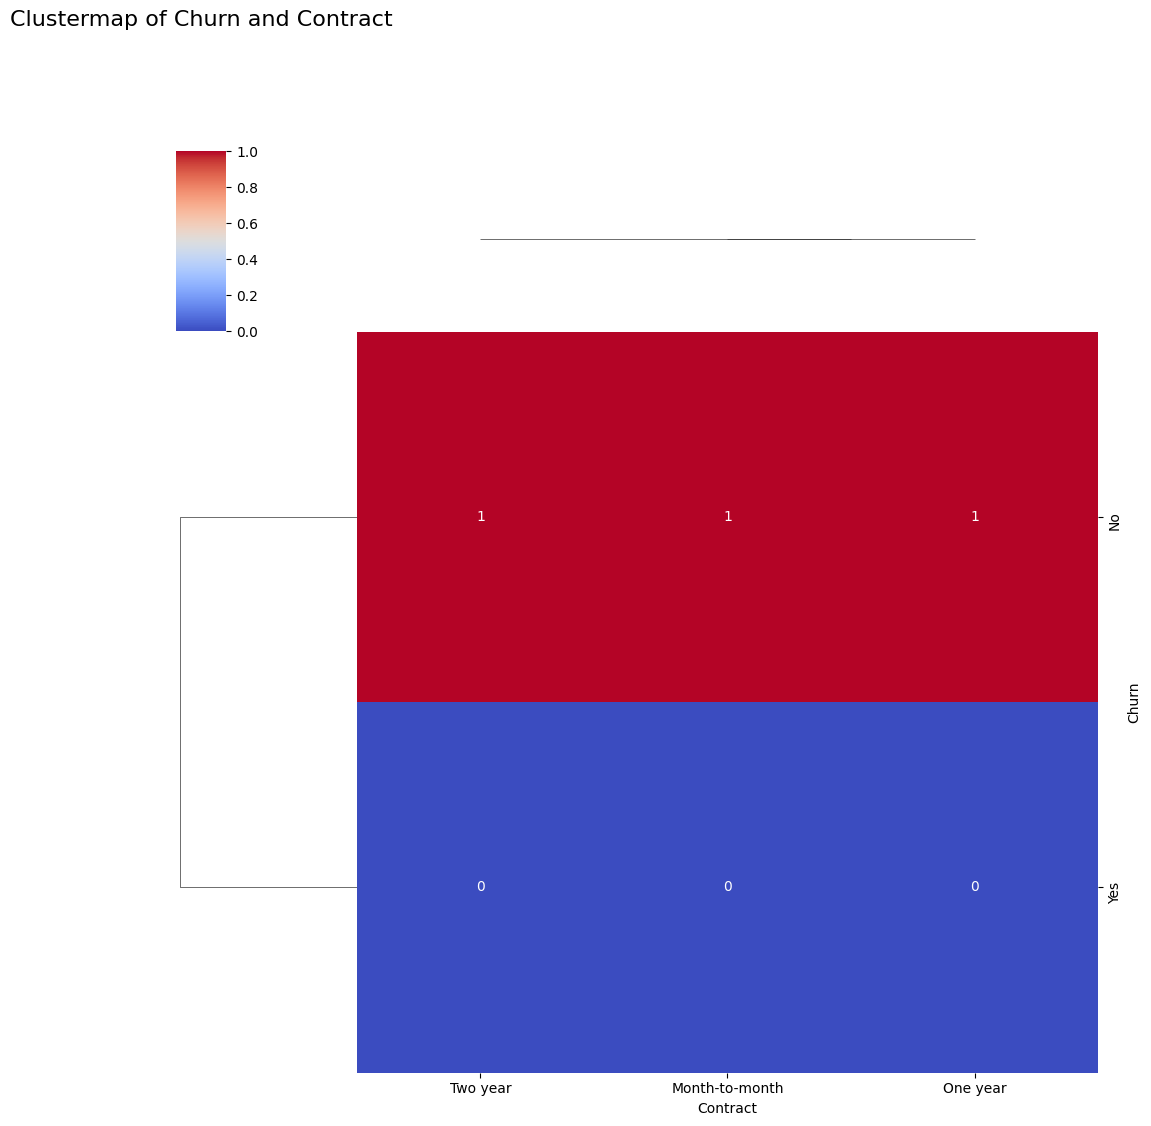

In [ ]:
cluster_data = pd.crosstab(data['Churn'], data['Contract'])
plt.figure(figsize=(10, 8))
sns.clustermap(cluster_data, annot=True, cmap='coolwarm', standard_scale=1)
plt.title('Clustermap of Churn and Contract', pad=90, fontsize=16)
plt.show()

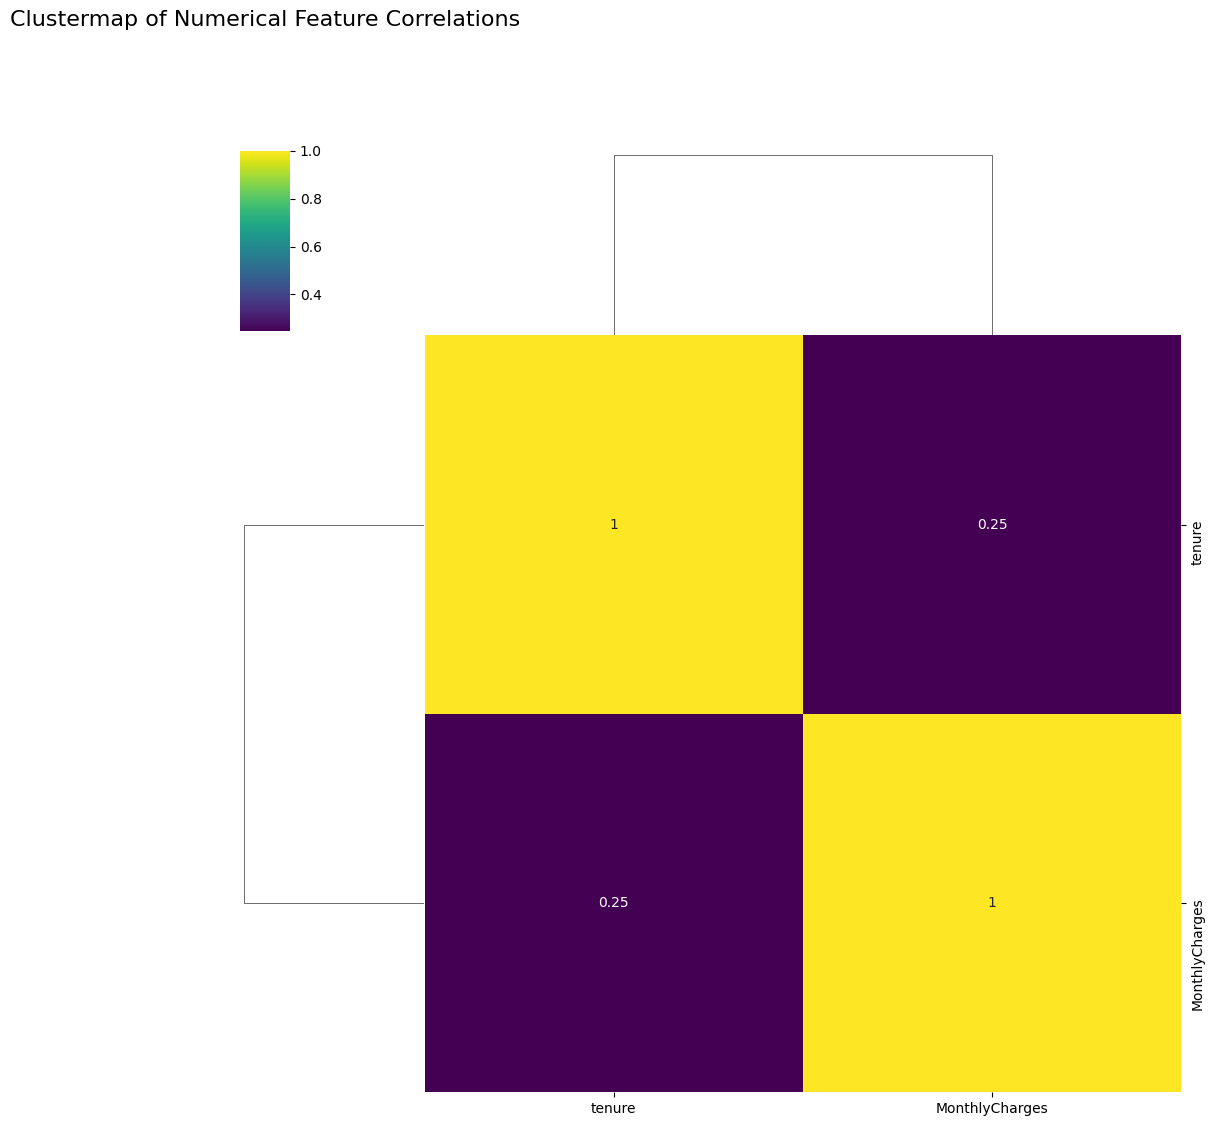

In [ ]:
numerical_data = data[['tenure', 'MonthlyCharges']]
sns.clustermap(numerical_data.corr(), annot=True, cmap='viridis')
plt.title('Clustermap of Numerical Feature Correlations', pad=90, fontsize=16)
plt.show()

***Analysis of Customer Churn Using Pair Plot***
- In this section, we will analyze the relationships between various numerical features in our dataset and how they relate to customer churn.

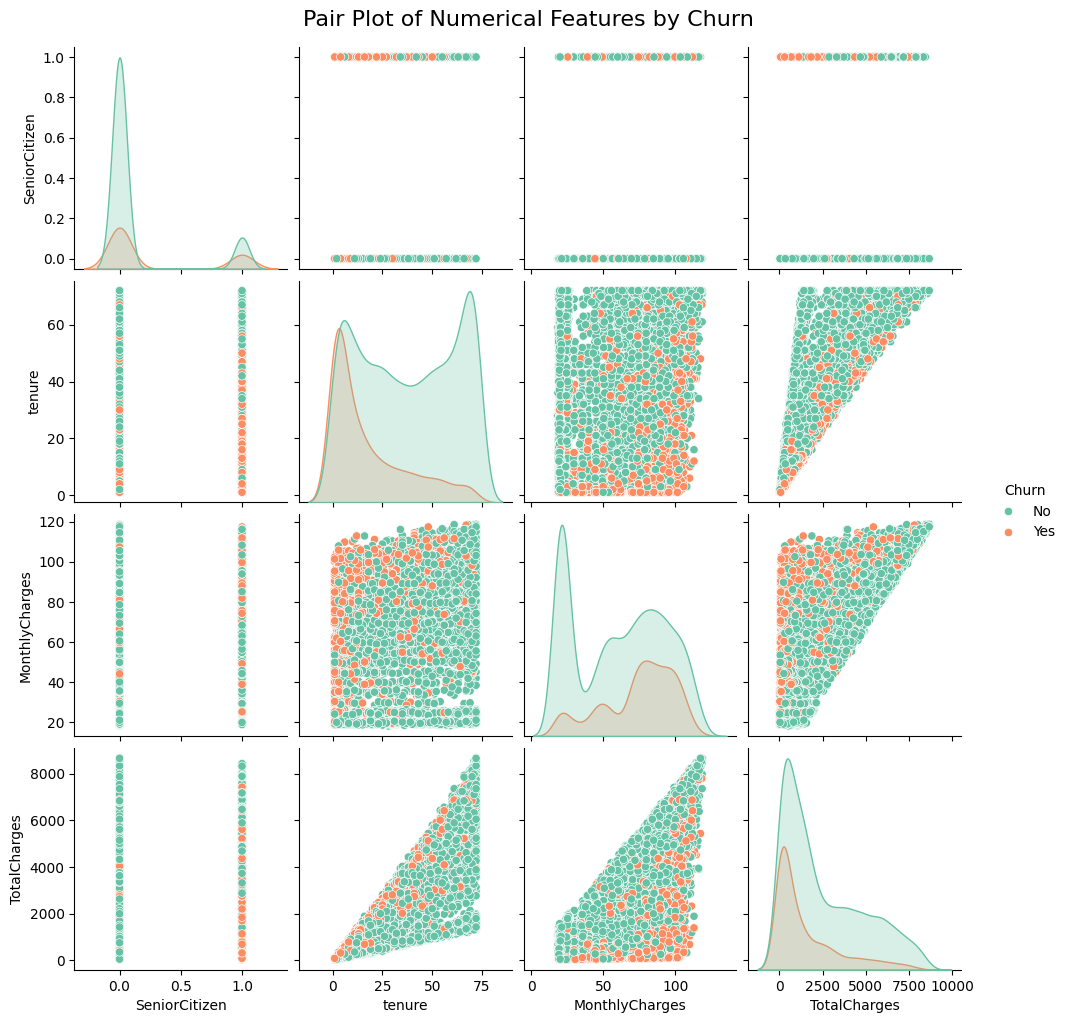

In [ ]:
sns.pairplot(data, hue='Churn', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02, fontsize=16)
plt.show()

Key Insights:
- Look for trends where certain features might indicate higher or lower chances of churn.

***Analysis of Monthly Charges Over Tenure by Churn***
- In this analysis, we will explore how monthly charges change over the duration of customer tenure and how these factors relate to customer churn.

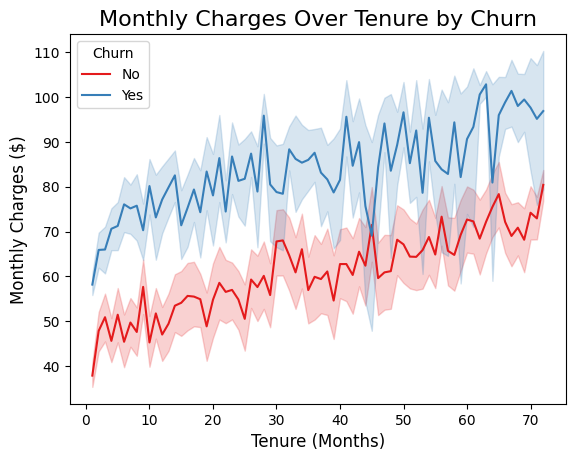

In [ ]:
sns.lineplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set1')
plt.title('Monthly Charges Over Tenure by Churn', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.legend(title='Churn')
plt.show()

Key Insights:
 - The line plot visually represents trend of MonthlyCharges over tenure, with lines differentiated by Churn.

***Analysis of Total Charges Over Tenure by Churn***
 - we will explore how total charges change over the duration of customer tenure and how these factors relate to customer churn.

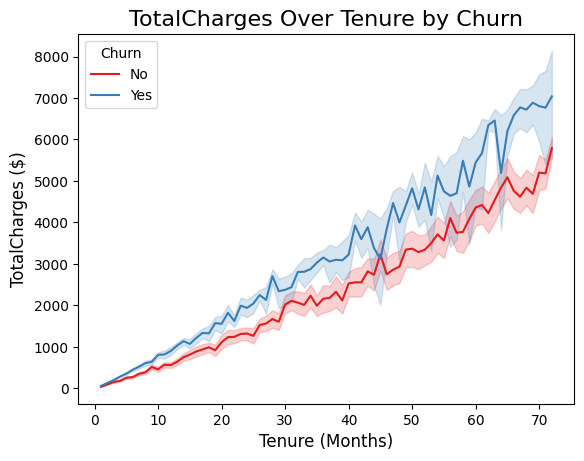

In [ ]:
sns.lineplot(data=data, x='tenure', y='TotalCharges', hue='Churn', palette='Set1')
plt.title('TotalCharges Over Tenure by Churn', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('TotalCharges ($)', fontsize=12)
plt.legend(title='Churn')
plt.show()

Key Insights:
- The line plot visually represents how total charges accumulate as customers remain with the service over time.

***Heatmap Analysis of Average Monthly and Total Charges by Contract Type and Churn Status***
 - This heatmap visualization provides insights into how different contract types influence customer behavior and retention.

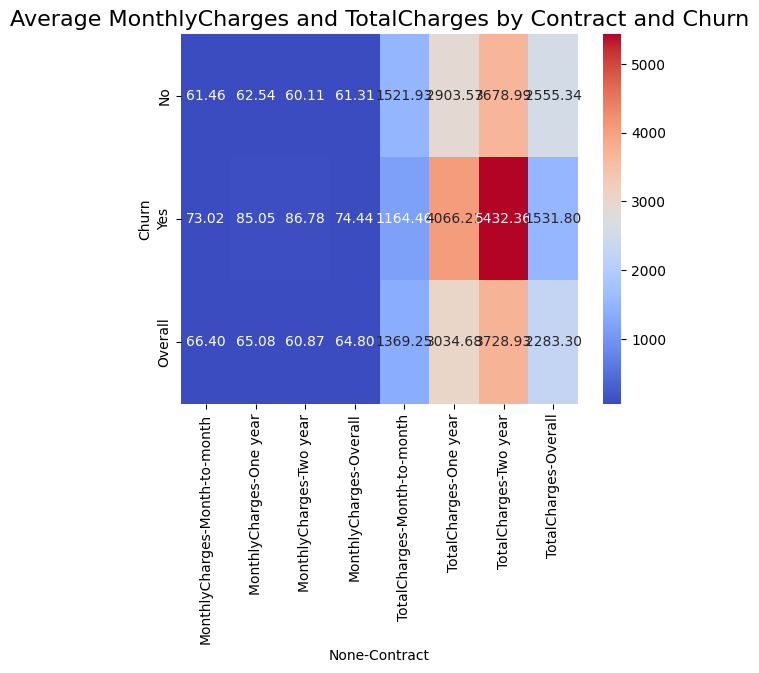

In [ ]:
pivot_table = pd.pivot_table(
    data,
    values=['MonthlyCharges', 'TotalCharges'],
    index='Churn',
    columns='Contract',
    aggfunc='mean',
    margins=True,
    margins_name='Overall'
)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Average MonthlyCharges and TotalCharges by Contract and Churn', fontsize=16)
plt.show()

Key Insights:
- The heatmap visually represents average monthly and total charges across different contract types for churned versus retained customers.
- Analyze how average charges differ between customers who have churned and those who have not across various contract types.